In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import pylab as pl
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 定标处理

In [2]:
t1 = [10,14,18,22,26]
x = [2100.17,2711.20,3401.77,4032.25,4658.99]
z1 = np.polyfit(x, t1, 1)  #一次多项式拟合，相当于线性拟合
t = np.poly1d(z1)
print (z1)
print (t)

[ 0.00621049 -2.99691321]
 
0.00621 x - 2.997


Text(0.5, 1.0, '定标图')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20301 missing from current font.
  f

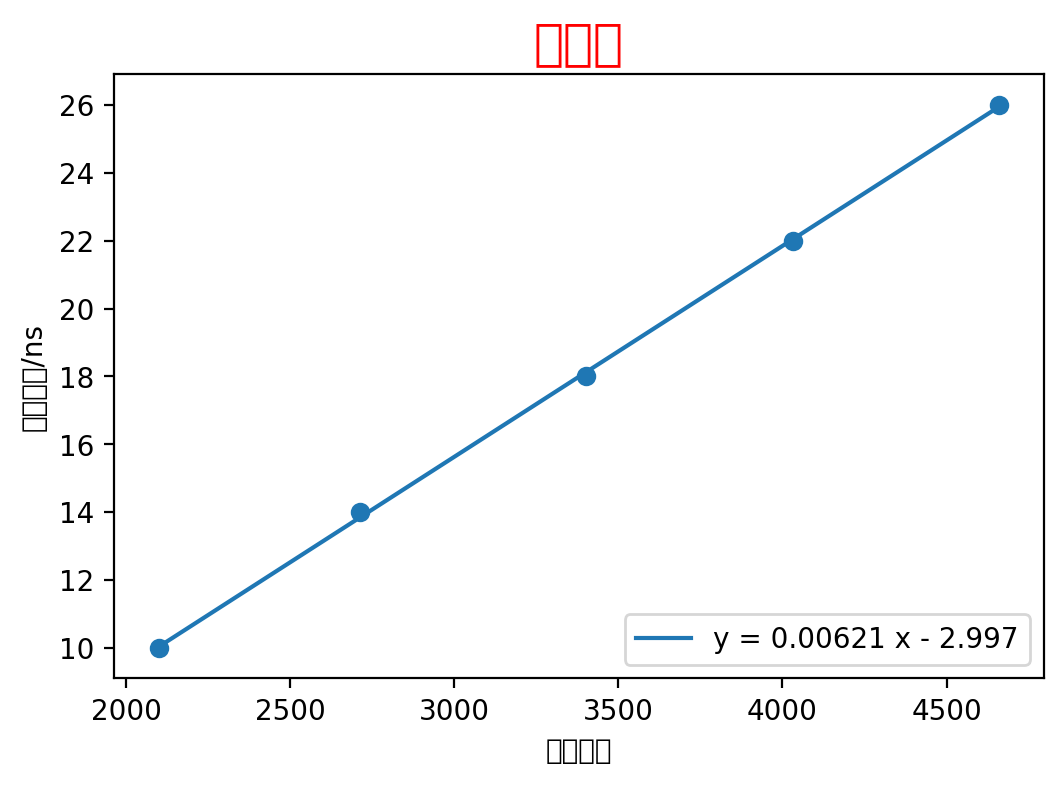

In [3]:
plt.figure(dpi=200)
plt.plot(x,t(x),label="y = 0.00621 x - 2.997")
plt.scatter(x,t1)

plt.xlabel("峰位道址")
plt.ylabel("延迟时间/ns")
plt.legend(loc="lower right")
plt.title("定标图",c='r',size = 18)

## 数据处理
本底7.338

In [5]:
f = open('202012292.txt')    #用test.txt先试试
s = f.read()
y = list(float(i) for i in s.split())
l = len(y)
x = range(l)

No handles with labels found to put in legend.


Text(0.5, 1.0, '样品中的正电子湮灭寿命谱')

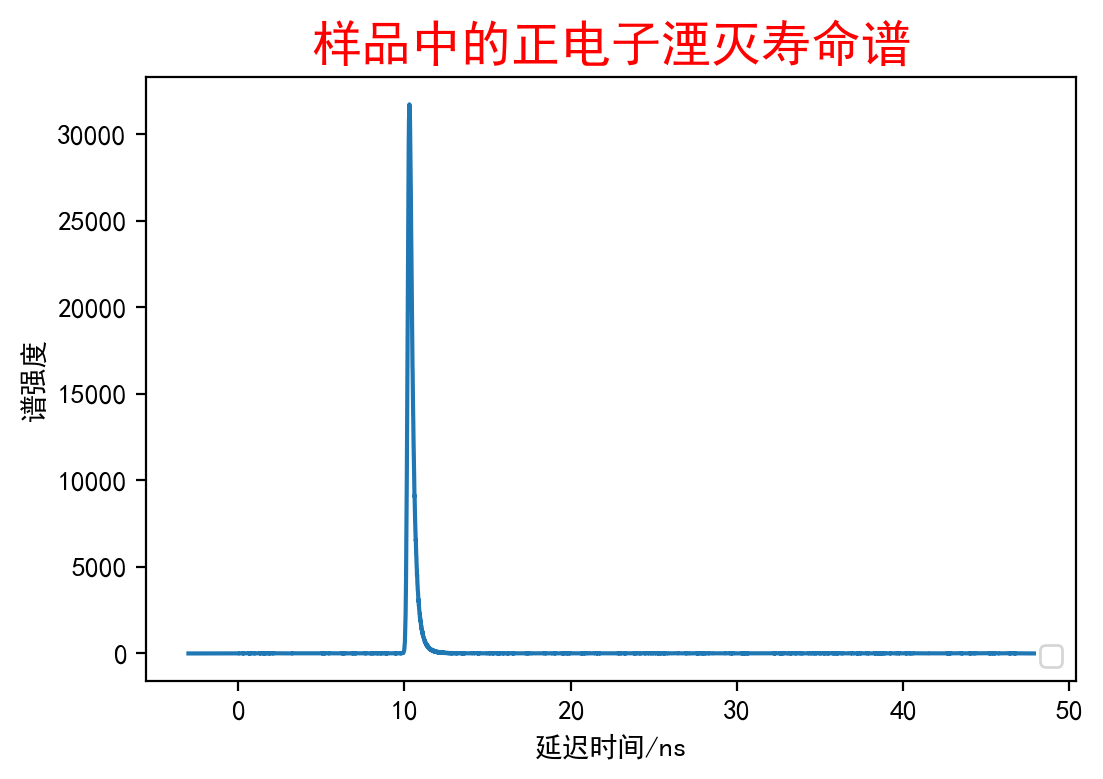

In [6]:
plt.figure(dpi=200)
plt.plot(t(x),y,)

plt.xlabel("延迟时间/ns")
plt.ylabel("谱强度")
plt.legend(loc="lower right")
plt.title("样品中的正电子湮灭寿命谱",c='r',size = 18)

In [7]:
#第一个非零值
for i in range(l):
    if y[i]!=0:
        print(i)
        break

466


In [8]:
#大于30000的第一个值
for i in range(l):
    if y[i]==max(y):
        print(i)
        break

2141


In [9]:
t(2500)

12.529324079695552

In [10]:
y = y[2141:2800:1]
x = x[2141:2800:1]
if len(y)==len(x):
    print("len(y)=len(x)")
t = np.array(t(x))
t = t - t[0]

len(y)=len(x)


No handles with labels found to put in legend.


Text(0.5, 1.0, '截取有效片段后的寿命谱')

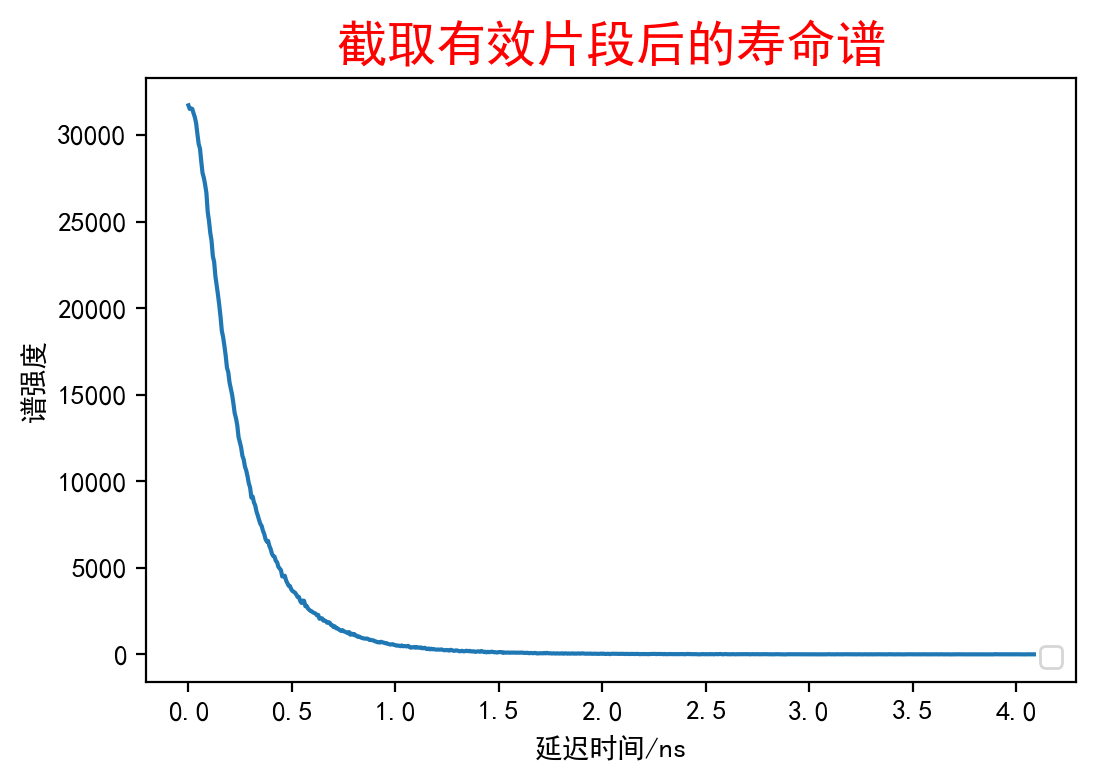

In [11]:
plt.figure(dpi=200)

t = np.array(t)
y = np.array(y)
plt.plot(t,y)

plt.xlabel("延迟时间/ns")
plt.ylabel("谱强度")
plt.legend(loc="lower right")
plt.title("截取有效片段后的寿命谱",c='r',size = 18)

In [12]:
t[240]
t[100]

0.621049491676974

No handles with labels found to put in legend.


Text(0.5, 1.0, '寿命谱（对数坐标）')

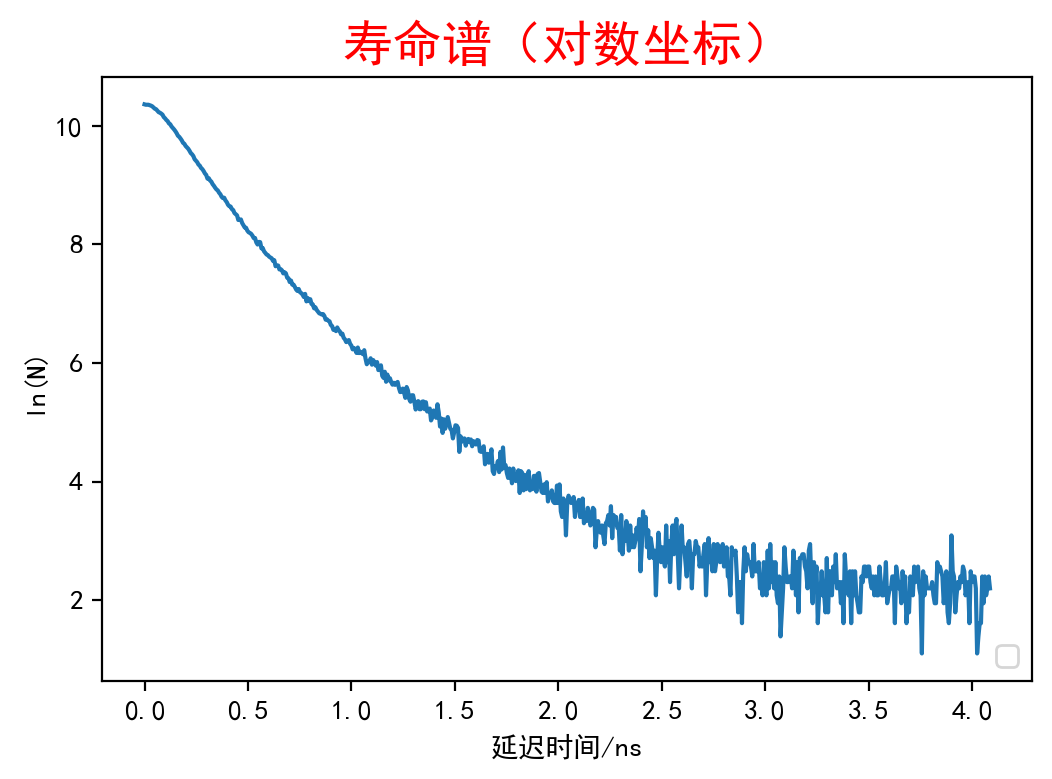

In [60]:
plt.figure(dpi=200)
plt.plot(t,np.log(y))

plt.xlabel("延迟时间/ns")
plt.ylabel("ln(N)")
plt.legend(loc="lower right")
plt.title("寿命谱（对数坐标）",c='r',size = 18)

## 考虑t比较大时

Text(0.5, 1.0, '$\\lambda_3$的求解')

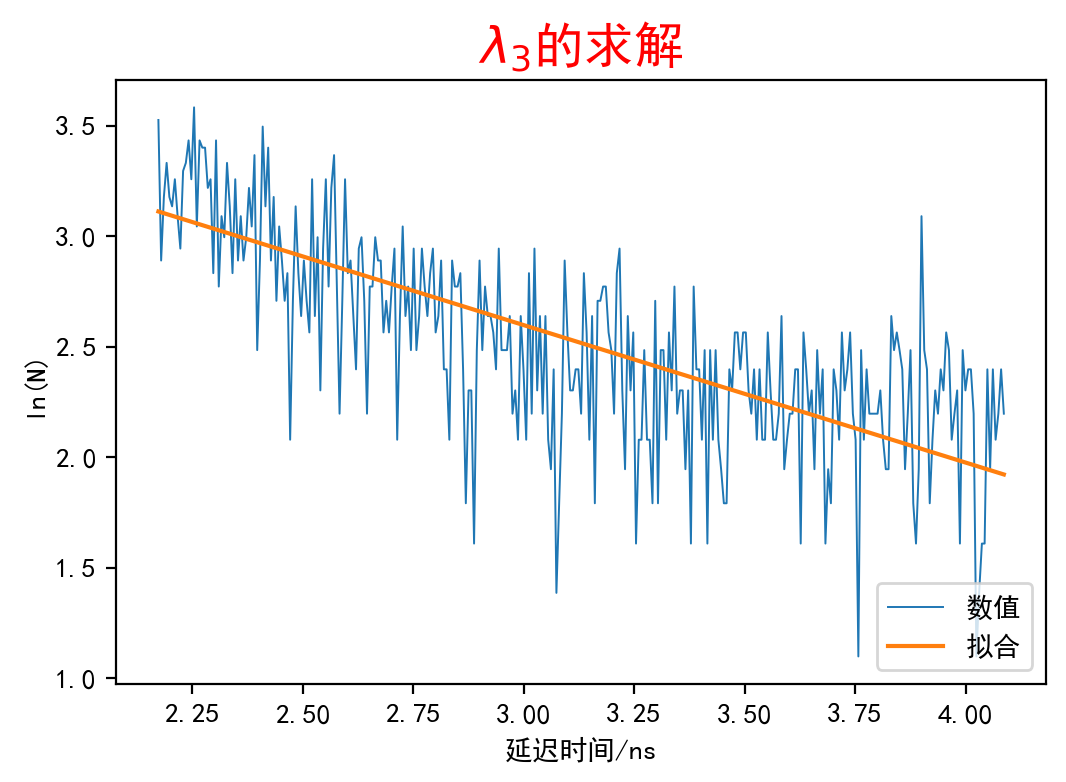

In [74]:
plt.figure(dpi=200)
plt.plot(t[350::],np.log(y[350::]),label="数值",linewidth=0.7)
plt.plot(t[350::],formula1(t[350::]),label="拟合")

plt.xlabel("延迟时间/ns")
plt.ylabel("ln(N)")
plt.legend(loc="lower right")
plt.title("$\lambda_3$的求解",c='r',size = 18)

In [75]:
z1 = np.polyfit(t[335::],np.log(y[335::]), 1)  #一次多项式拟合，相当于线性拟合
formula1 = np.poly1d(z1)
print(z1)
print ("The fit result is:"+str(formula1))
print("\nlifetime is:"+str(-1/z1[0]))

[-0.62215191  4.46461382]
The fit result is: 
-0.6222 x + 4.465

lifetime is:1.6073244884655982


## 除去最短的寿命，考虑其他的

In [76]:
y_remain = y - np.exp(formula1(t))

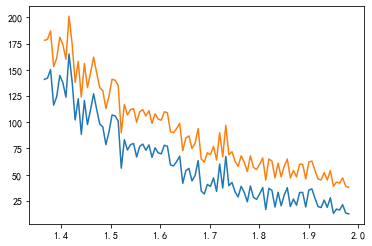

In [77]:
plt.plot(t[220:320:],y_remain[220:320:])
plt.plot(t[220:320:],y[220:320:])

Text(0.5, 1.0, '$\\lambda_2$的求解')

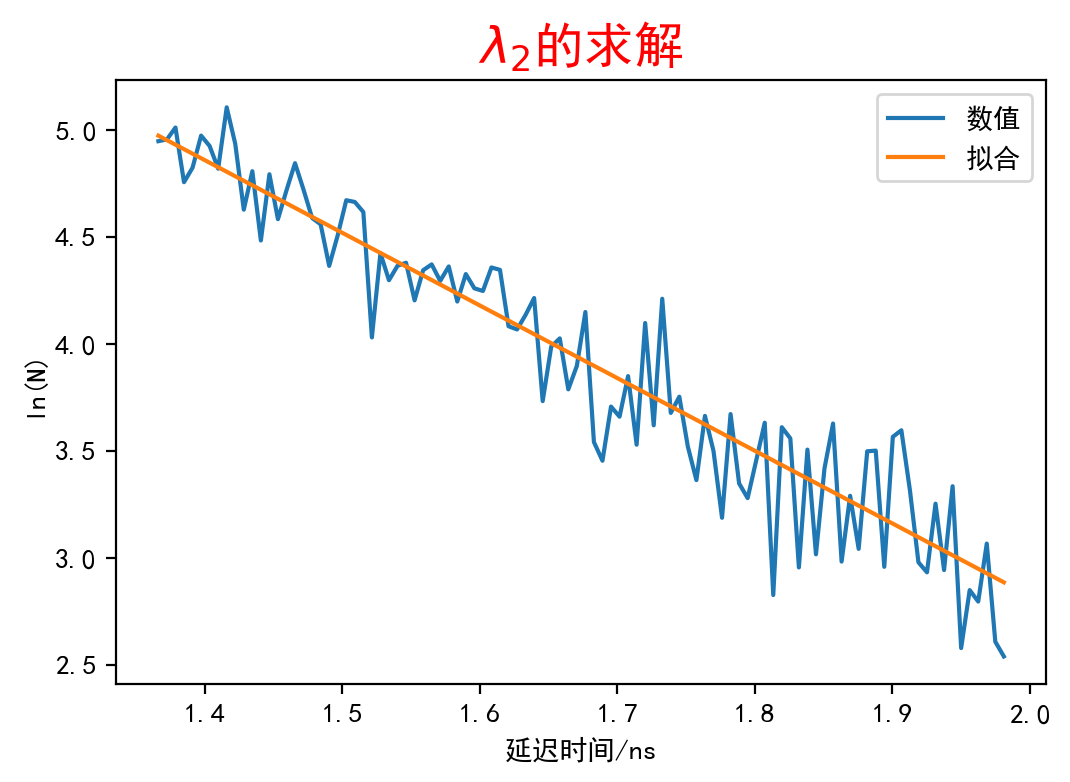

In [78]:
plt.figure(dpi=200)
plt.plot(t[220:320:],np.log(y_remain[220:320:]),label="数值")
plt.plot(t[220:320:],formula2(t[220:320:]),label="拟合")#,c='black')

plt.xlabel("延迟时间/ns")
plt.ylabel("ln(N)")
plt.legend(loc="best")
plt.title("$\lambda_2$的求解",c='r',size = 18)

In [79]:
z2 = np.polyfit(t[180:280:],np.log(y_remain[180:280:]), 1)  #一次多项式拟合，相当于线性拟合
formula2 = np.poly1d(z2)
print(z2)
print ("The fit result is:"+str(formula2))
print("\nlifetime is:"+str(-1/z2[0]))

[-3.39599155  9.61360271]
The fit result is: 
-3.396 x + 9.614

lifetime is:0.29446480767364674


## 除去最短的和第二短的，考虑最长的

In [80]:
y_remain = y - np.exp(formula1(t)) - np.exp(formula2(t))

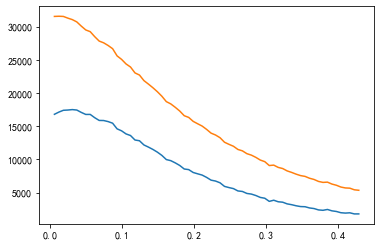

In [81]:
plt.plot(t[1:70:],y_remain[1:70:])
plt.plot(t[1:70:],y[1:70:])

Text(0.5, 1.0, '$\\lambda_1$的求解')

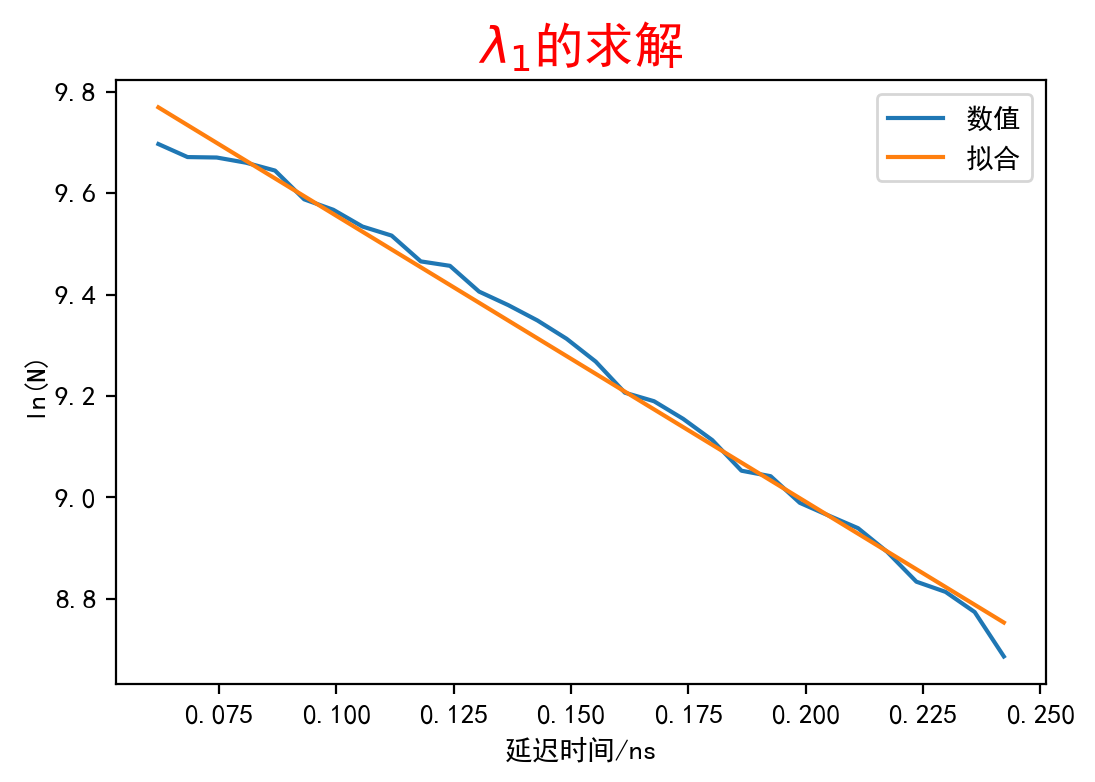

In [83]:
plt.figure(dpi=200)
plt.plot(t[10:40:],np.log(y_remain[10:40:]),label="数值")  #一次多项式拟合，相当于线性拟合
plt.plot(t[10:40:],formula3(t[10:40:]),label="拟合")

plt.xlabel("延迟时间/ns")
plt.ylabel("ln(N)")
plt.legend(loc="best")
plt.title("$\lambda_1$的求解",c='r',size = 18)

In [72]:
z3 = np.polyfit(t[10:40:],np.log(y_remain[10:40:]), 1)  #一次多项式拟合，相当于线性拟合
formula3 = np.poly1d(z3)
print(z3)
print ("The fit result is:"+str(formula3))
print("\nlifetime is:"+str(-1/z3[0]))

[-5.64220075 10.11976698]
The fit result is: 
-5.642 x + 10.12

lifetime is:0.17723580652880375


659

In [86]:
kkkkkkkkkk = np.exp(10.11976698)/sum(y)

In [88]:
kkkkkkkkkk*

0.005328312478018189

In [90]:
kkkkkkkkkk*1.6

0.028951918680559637

In [92]:
500/2821/1.6

0.11077632045373981

In [93]:
250/849/1.6

0.18404004711425204

In [94]:
1

1